In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
import skimage as ski

import skimage.io
import skimage.transform

import scipy.fftpack as spfft

plt.rcParams['figure.dpi']=100

In [2]:
def construct_DCT_Mat(Columns,Rows):
    Dx = spfft.dct(np.eye(Columns), axis =0, norm='ortho')
    Dy = spfft.dct(np.eye(Rows), axis = 0, norm='ortho')
    D = np.kron(Dy, Dx)
    return D

def construct_iDCT_Mat(Columns,Rows):
    Dx = spfft.idct(np.eye(Columns), axis =0, norm='ortho')
    Dy = spfft.idct(np.eye(Rows), axis = 0, norm='ortho')
    D = np.kron(Dy, Dx)
    return D

In [8]:
def thresholder(indicies, threshold, DCTF, Dinv):
    number = np.round(len(DCTF)*threshold/100)
    DCTFcopy = DCTF.copy()
    for jj in range(len(DCTF)):
        if jj > number - 1:
            DCTFcopy[indicies[jj]] = 0            
    
    img = np.dot(Dinv, DCTFcopy).reshape(53,41)
    plt.imshow(img, cmap = 'gray')
    #plt.title('Image Reconstruction with ${}$% of DCT Coefficients'.format(threshold))
    plt.xticks([])
    plt.yticks([])
    return plt.show()

In [4]:
def twosolver(r, vecF, Dinv):
    M = int(np.round(r*len(vecF)))
    
    fig, ax = plt.subplots(1,3)
    fig.suptitle('Reconstruction of Son of Man using {} Observations'.format(M))
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    for blah in range(3):
        keeps = np.random.choice(len(vecF), size = M, replace = False)
        B = (np.eye(len(vecF)))[keeps,:]
    
        y = np.dot(B, vecF).reshape(-1)
        A = np.dot(B, Dinv)
        
        x = cvx.Variable(len(vecF))
        prob = cvx.Problem(cvx.Minimize(cvx.norm1(x)), [A@x == y])
        prob.solve(verbose=True, solver ='CVXOPT', max_iter= 1000, reltol=1e-2, featol = 1e-2)
        
        xstar = (x.value).reshape(-1,1)
        
        Fstar = (np.dot(Dinv, xstar)).reshape(53,41)
        
        ax[blah].imshow(Fstar, cmap = 'gray')
        ax[blah].set_title('Trial {}'.format(blah+1))
        ax[blah].set_xticklabels([])
        ax[blah].set_yticklabels([])

C:\Users\Bwa\AppData\Local\Temp/ipykernel_10040/1333832696.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img_og = ski.color.rgb2gray(img_og)


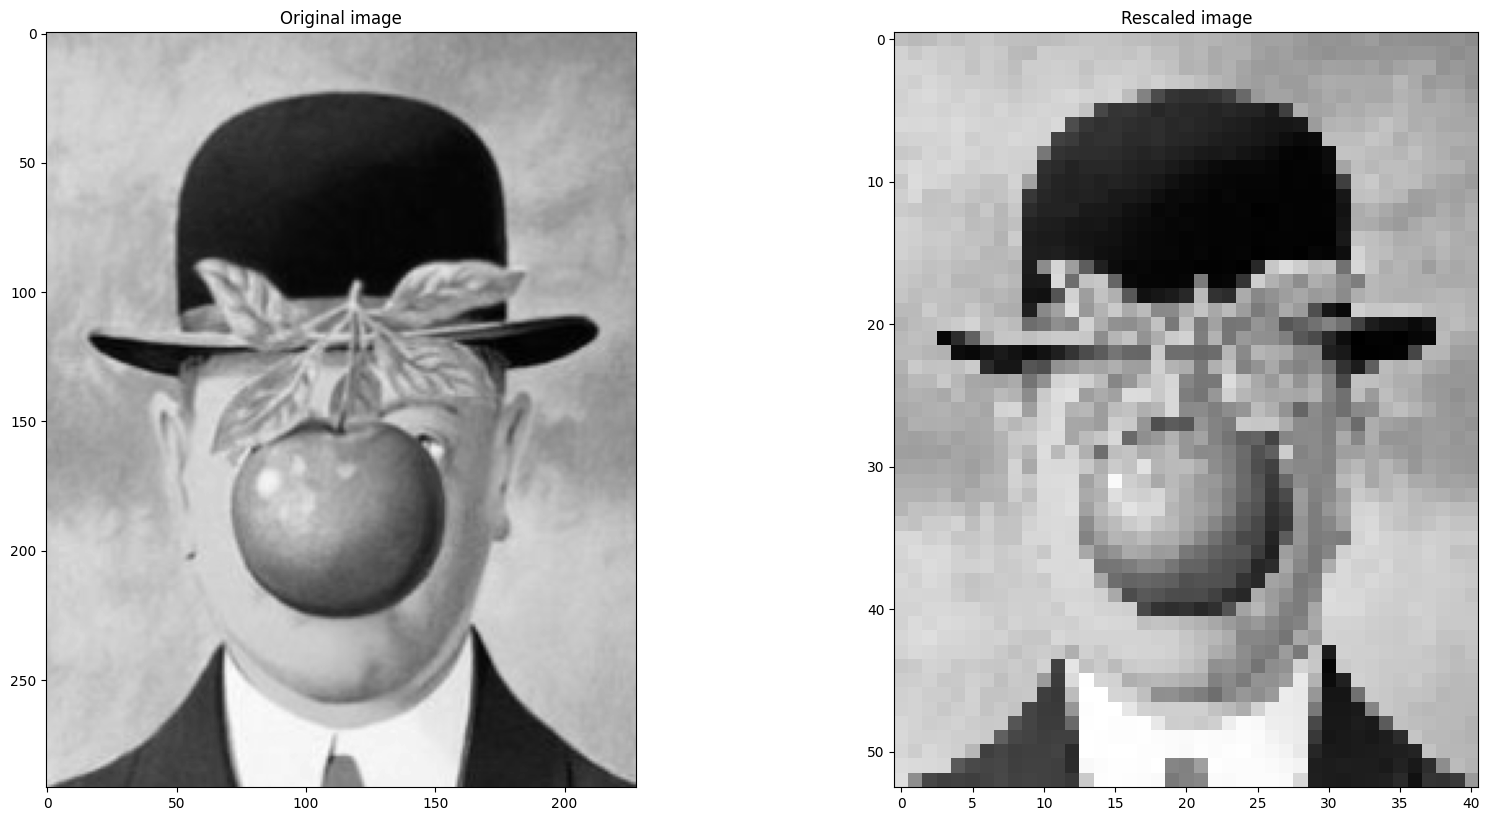

(292, 228) (53, 41)


In [5]:
img_path = 'SonOfMan.png'
img_og = ski.io.imread(img_path)
img_og = ski.color.rgb2gray(img_og)
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(img_og, cmap = 'gray')
ax[0].set_title("Original image")
img = ski.transform.rescale( img_og, 0.18, anti_aliasing=False)
ax[1].imshow(img, cmap='gray')
ax[1].set_title("Rescaled image")
plt.show()

## 1

In [12]:
D = construct_DCT_Mat(41,53)
Di = construct_iDCT_Mat(41,53)

print(D.shape, Di.shape)

(2173, 2173) (2173, 2173)


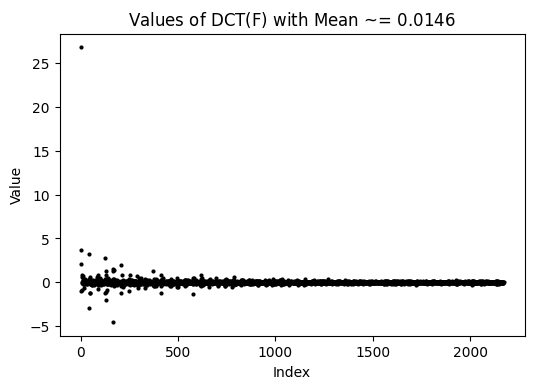

In [13]:
F = np.reshape(img.flatten(), (-1,1))

DF = np.dot(D, F)

plt.plot(np.arange(len(DF)), DF, 'ko',ms=2)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Values of DCT(F) with Mean ~= $0.0146$' )
plt.show()

In [14]:
idx = np.argsort(np.abs(DF), axis = 0)
idxmax = idx[::-1]

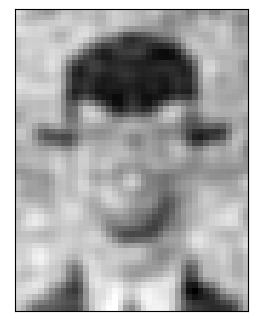

In [15]:
thresholder(idxmax, 5, DF, Di)

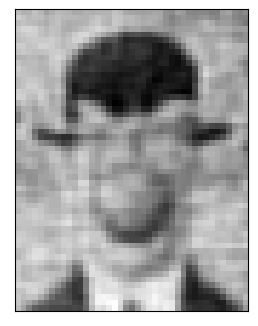

In [16]:
thresholder(idxmax, 10, DF, Di)

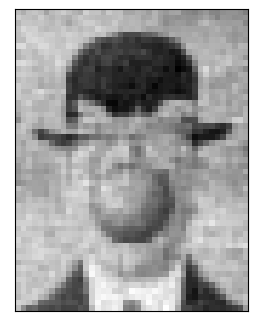

In [17]:
thresholder(idxmax, 20, DF, Di)

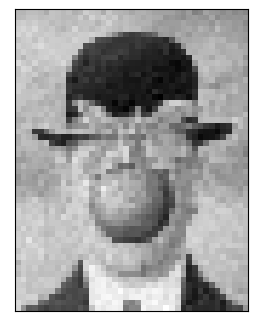

In [18]:
thresholder(idxmax, 40, DF, Di)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Feb 27 11:49:20 AM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Feb 27 11:49:20 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 27 11:49:20 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 27 11:49:20 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 27 11:49:20 AM: Compiling problem (target solver=CVXOPT).
(CVXPY) Feb 27 11:49:20 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

(CVXPY) Feb 27 11:50:52 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> CVXOPT
(CVXPY) Feb 27 11:50:52 AM: Applying reduction Dcp2Cone
(CVXPY) Feb 27 11:50:52 AM: Applying reduction CvxAttr2Constr
(CVXPY) Feb 27 11:50:52 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Feb 27 11:50:53 AM: Applying reduction CVXOPT
(CVXPY) Feb 27 11:50:53 AM: Finished problem compilation (took 3.571e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Feb 27 11:50:53 AM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0: -2.0820e-14  5.2031e-15  1e+04  4e+02  4e-16  1e+00
 1:  3.2420e+01  3.2553e+01  6e+03  2e+02  2e-16  6e-01
 2:  4.7769e+01  4.8104e+01  2e+03  6e+01  3e-16  5e-01
 3:  6.9128e+01  6.9299e+01  1e+03  3e+

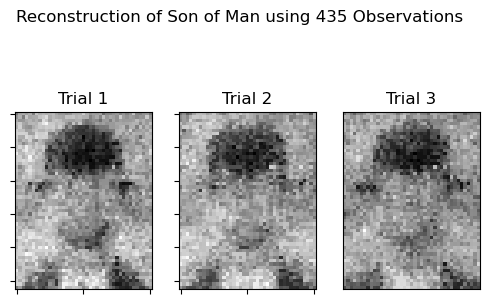

In [13]:
twosolver(0.2,F,Di)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Feb 27 11:53:46 AM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Feb 27 11:53:46 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 27 11:53:46 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 27 11:53:46 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 27 11:53:46 AM: Compiling problem (target solver=CVXOPT).
(CVXPY) Feb 27 11:53:46 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

(CVXPY) Feb 27 11:56:00 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> CVXOPT
(CVXPY) Feb 27 11:56:00 AM: Applying reduction Dcp2Cone
(CVXPY) Feb 27 11:56:00 AM: Applying reduction CvxAttr2Constr
(CVXPY) Feb 27 11:56:00 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Feb 27 11:56:00 AM: Applying reduction CVXOPT
(CVXPY) Feb 27 11:56:01 AM: Finished problem compilation (took 6.186e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Feb 27 11:56:01 AM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0: -5.0144e-14  6.8191e-14  3e+04  8e+02  6e-16  1e+00
 1:  3.2001e+01  3.2344e+01  1e+04  3e+02  3e-16  8e-01
 2:  5.0489e+01  5.0677e+01  2e+03  5e+01  2e-16  3e-01
 3:  9.1670e+01  9.1752e+01  7e+02  2e+

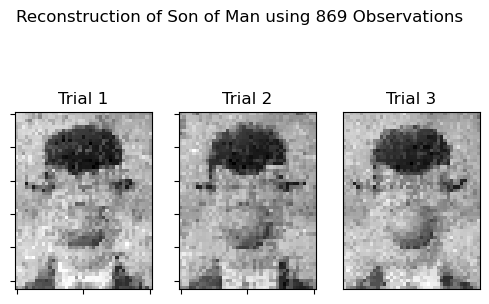

In [14]:
twosolver(0.4,F,Di)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Feb 27 11:57:00 AM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Feb 27 11:57:00 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 27 11:57:00 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 27 11:57:00 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 27 11:57:00 AM: Compiling problem (target solver=CVXOPT).
(CVXPY) Feb 27 11:57:00 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

(CVXPY) Feb 27 11:59:40 AM: Applying reduction Dcp2Cone
(CVXPY) Feb 27 11:59:40 AM: Applying reduction CvxAttr2Constr
(CVXPY) Feb 27 11:59:40 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Feb 27 11:59:40 AM: Applying reduction CVXOPT
(CVXPY) Feb 27 11:59:41 AM: Finished problem compilation (took 1.009e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Feb 27 11:59:41 AM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  5.3690e-14  5.5634e-14  4e+04  1e+03  7e-16  1e+00
 1:  3.2759e+01  3.3371e+01  1e+04  4e+02  4e-16  1e+00
 2:  5.4401e+01  5.4515e+01  2e+03  6e+01  3e-16  2e-01
 3:  1.0861e+02  1.0865e+02  6e+02  2e+01  4e-16  6e-02
 4:  1.6624e+02  1.6626e+02  2e+02  5e+00  7e-16  2e-02
 5:  1.9586e+02  1.9586e+02  5e

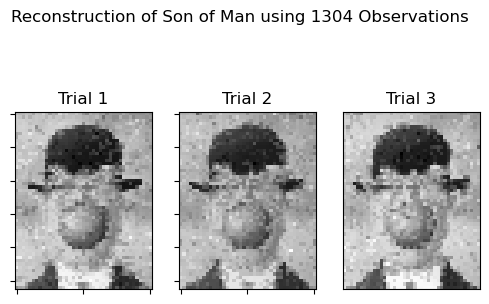

In [15]:
twosolver(0.6,F,Di)

In [30]:
Dun = construct_DCT_Mat(50,50)
Diun = construct_iDCT_Mat(50,50)

In [4]:
with np.load('Unknownimage.npz') as data:
    Bun = data['B']
    yun = data['y']
    
print(Bun.shape, yun.shape)

(2000, 2500) (2000,)


In [42]:
Aun = np.dot(Bun, Diun)

xun = cvx.Variable(Bun.shape[1])
prob = cvx.Problem(cvx.Minimize(cvx.norm1(xun)), [Aun@xun == yun])
prob.solve(verbose=True, solver ='CVXOPT', max_iter= 1000, reltol=1e-2, featol = 1e-2)
        
xunstar = (xun.value).reshape(-1,1)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Feb 27 12:22:41 PM: Your problem has 2500 variables, 1 constraints, and 0 parameters.
(CVXPY) Feb 27 12:22:41 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 27 12:22:41 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 27 12:22:41 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 27 12:22:41 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Feb 27 12:22:41 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

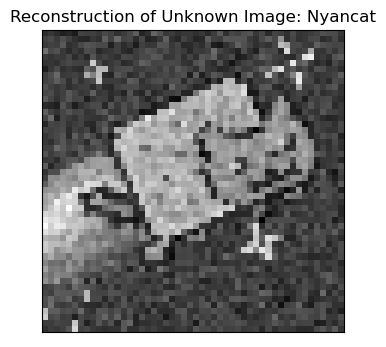

In [46]:
Fstarun = (np.dot(Diun, xunstar)).reshape(50,50)

plt.imshow(Fstarun, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Reconstruction of Unknown Image: Nyancat')
plt.show()